## Predicting Restuarant Rating Based on other features


# importing datasets


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/Dataset .csv')

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
df.shape

(9551, 21)

In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
df['Cuisines']

,Cuisines
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
...,...
9546,Turkish
9547,"World Cuisine, Patisserie, Cafe"
9548,"Italian, World Cuisine"
9549,Restaurant Cafe


In [ ]:
#handling missing values in Cuisine column
df['Cuisines'].fillna('Unknown',inplace=True)

In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
# #standardizing data (Wont work since data is not only in numerical form)
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)

In [ ]:
#One hot encoding data
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [ ]:
df_encoded= pd.get_dummies(df,columns=cat_col,drop_first=True)

In [ ]:
df_encoded.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Restaurant Name_#Dilliwaala6,Restaurant Name_#InstaFreeze,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,6317637,162,121.027535,14.565443,1100,3,4.8,314,False,False,...,False,False,False,False,False,True,False,False,False,False
1,6304287,162,121.014101,14.553708,1200,3,4.5,591,False,False,...,False,False,False,False,False,True,False,False,False,False
2,6300002,162,121.056831,14.581404,4000,4,4.4,270,False,False,...,True,False,False,False,False,False,False,False,False,True
3,6318506,162,121.056475,14.585318,1500,4,4.9,365,False,False,...,False,False,False,False,False,True,False,False,False,False
4,6314302,162,121.057508,14.584450,1500,4,4.8,229,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
#Spliting data
X=df_encoded.drop('Aggregate rating',axis=1)
y=df_encoded['Aggregate rating']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Votes,Restaurant Name_#Dilliwaala6,Restaurant Name_#InstaFreeze,Restaurant Name_#OFF Campus,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
1115,8417,1,77.306073,28.472912,1900,3,56,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7633,301912,1,77.039089,28.621372,100,1,4,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8267,18424175,1,77.387116,28.533194,100,1,0,False,False,False,...,False,False,False,True,False,False,False,True,False,False
7209,18418252,1,77.282282,28.632808,250,1,1,False,False,False,...,False,False,False,True,False,False,False,True,False,False
6242,2958,1,77.135169,28.688001,600,2,75,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
y_train.head()

,Aggregate rating
1115,3.3
7633,3.0
8267,0.0
7209,0.0
6242,2.5


# Using Decison tree regression for training model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
#create model
tree_model=DecisionTreeRegressor(max_depth=12,random_state=42)

#fitting model
tree_model.fit(X_train,y_train)

#making predictions
y_pred=tree_model.predict(X_test)

# Evaluating Model using MSE and r2 score

In [ ]:
y_pred=tree_model.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
mse

0.0325516120731877

In [ ]:
r2

0.9856985705817358

In [ ]:
import seaborn as sns

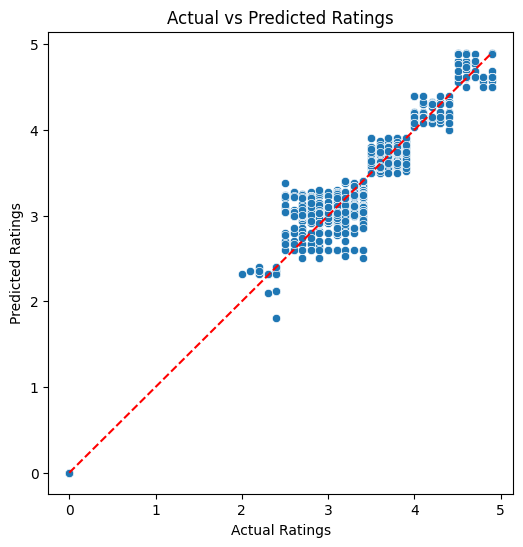

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.show()


#Understanding most influential features

In [ ]:
feature_importances=pd.Series(tree_model.feature_importances_,index=X.columns)
feature_importances=feature_importances.sort_values(ascending=False)

In [ ]:
feature_importances

,0
Votes,0.905286
Rating color_Orange,0.051936
Rating color_Red,0.022374
Rating color_Yellow,0.013188
Rating color_Green,0.002601
...,...
Restaurant Name_Top Burger,0.000000
Restaurant Name_Top Breads,0.000000
Restaurant Name_Toodz House,0.000000
Restaurant Name_Too Maach,0.000000


# So in conclusion Votes is by far the most influential feature (over 90% contribution).
* Followed by Ratings
* Other features dont influence